# Van der Waals Gas Model

## Settings

In [86]:
# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import exp, log, sqrt, tanh, cosh, pi, sin
import numpy.polynomial.legendre as legendre

# SciPy
import scipy.optimize as optimize
import scipy.linalg as linalg
# Matplotlib
mpl.style.use('default')
mpl.rcParams['legend.frameon']   = False
mpl.rcParams['mathtext.fontset'] = 'cm'

## General Functions

In [70]:
def newtonraphson(f, f1, x,arg):
    ep = 10**-9
    fguess = f(x,arg)
    fpguess = f1(x,arg)
    error = 1.0
    imax = 1000
    i = 0
    while abs(error) > ep and i < imax:
        xnew  = x - (fguess/fpguess)
        error = xnew/x - 1
        x = xnew
        fguess = f(x,arg)
        fpguess = f1(x,arg)
        i += 1

    return x
# Bisectional method
def bisection(f, x1, x2, arg1, arg2):
    # Set limits
    accuracy = 1E-9
    Nmax     = 1000
    
    # Init and check
    f1 = f(x1,arg1,arg2)
    f2 = f(x2,arg1,arg2)
    if f1*f2 > 0:
        return
    
    # Iterate
    i     = 0
    delta = 1.0
    
    while abs(delta) > accuracy and i < Nmax:
        # Increment
        i += 1
        
        # Midpoint
        xc    = (x1 + x2)/2
        fc    = f(xc,arg1,arg2)
        delta = (xc - x1)/xc
        
        # Check
        if f1*fc > 0:
            x1 = xc
            f1 = fc
        else:
            x2 = xc
            f2 = fc
    
    return xc, i, delta
def Simpson(f, h):
    s = len(f)
    I = f[0]+f[-1] 
    I += 4.0*np.sum(f[1:s-1:2]) # add the odd terms
    I += 2.0*np.sum(f[2:s-2:2]) # add the even terms
    I *= h/3
    return I

## Van der Waals Isotherms
### Introduction
There are many gas models that have been found through statistical physics and thermodynamics. The most well known one is the ideal gas law. However, for this project, we'll be studying the Van der Waals Model, which is of course a non-ideal liquid-gas model. We're given the equation of state of a Van der Waals gas:
$\\ \left(P+\frac{aN^2}{V^2}\right)\left(V-Nb\right)=NkT \\ \rightarrow P+\frac{aN^2}{V^2}=\frac{NkT}{\left(V-Nb\right)}\rightarrow P\left(T,V,N\right)=\frac{NkT}{\left(V-Nb\right)}-\frac{aN^2}{V^2}$
$\left(\frac{\partial P}{\partial V}\right)_{T,N} = -\frac{NkT}{\left(V-Nb\right)^2}+\frac{2aN^2}{V^3}\rightarrow-\frac{NkT_{c}}{\left(V_{c}-Nb\right)^2}+\frac{2aN^2}{V_{c}^3}=0\rightarrow NkT_{c}=\left(V_{c}-Nb\right)^2\frac{2aN^2}{V_{c}^3}\\ \left(\frac{\partial^2 P}{\partial V^2}\right)_{T,N}=\frac{2NkT}{\left(V-Nb\right)^3}-\frac{6aN^2}{V^4}\rightarrow \frac{2NkT_{c}}{\left(V_{c}-Nb\right)^3}-\frac{6aN^2}{V_{c}^4}=0\rightarrow \frac{4aN^2}{\left(V_{c}-Nb\right)V_{c}^3}=\frac{6aN^2}{V_{c}^4}\rightarrow\frac{2}{V_{c}-Nb}=\frac{3}{V_{c}}\longrightarrow V_{c}=3Nb\\kT_{c}=\frac{\left(2Nb\right)^2\left(2aN^2\right)}{N\left(27N^3b^3\right)}\longrightarrow kT_{c}=\frac{8a}{27b}$
$P_{c}=\frac{N\cdot \frac{8a}{27b}}{2Nb} - \frac{aN^2}{9N^2b^2}=\frac{8a}{54b^2} - \frac{6a}{54b^2}\longrightarrow P_{c}= \frac{a}{27b^2}$
$P_{c}p(v,t)=\frac{Nk\left(T_{c}t\right)}{\left(V_{c}v-Nb\right)}-\frac{aN^2}{V_{c}^2v^2}\rightarrow \left(\frac{a}{27b^2}\right)\cdot p(v,t)=\frac{8at}{27b^2\left(3v-1\right)} - \frac{a}{9b^2v^2}\\ \longrightarrow p(v,t)=\frac{8t}{3v-1} - \frac{3}{v^2}$
We will simply plot p(v,t) and find its roots using a modified Newton-Raphson method, for every isotherm.

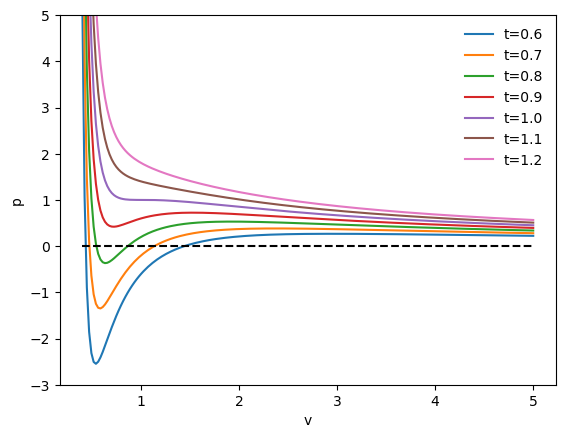

In [84]:
def p(v,t):
    return (8*t)/(3*v-1) - (3/(v*v))
h = 0.001
def pder(v,t):
    return (p(v+h,t) - p(v-h,t))/(2*h)

v = np.linspace(0.4,5,200)
t = [0.6,0.7,0.8,0.9,1.0,1.1,1.2]
for i in range(len(t)):
    pplot = p(v,t[i])
    plt.plot(v,pplot,label=f't={t[i]}')
zero = v
plt.plot(v,zero*0,'k--')
plt.ylim(-3,5)
plt.xlabel('v')
plt.ylabel('p')
plt.legend()
plt.show()

**Figure 1:** The graph shown above shows plots, at different temperatures, the volume dependence for the pressure. At $t \le 1$, the system is a liquid-gas, and we can see that there exists a pressure maximum and minimum. At $t > 1$, the system is a gas, and there's no pressure maxima or minima.

In [85]:
for i in range(len(t)):
    if i > 2:
        print(f"t = {t[i]}") # Clearly observed with no roots.
        print(f"No roots.")
    else:
        root1 = newtonraphson(p, pder, 0.4,t[i]) # 1st root of t
        root2 = newtonraphson(p, pder, 1,t[i]) # 2nd root of t
        print(f"t = {t[i]}")
        print(f"1st root: {root1}")
        print(f"2nd root: {root2}")

t = 0.6
1st root: 0.43360889073133385
2nd root: 1.441391109268659
t = 0.7
1st root: 0.47188972105344573
2nd root: 1.135253136089406
t = 0.8
1st root: 0.5430163942818813
2nd root: 0.863233605718119
t = 0.9
No roots.
t = 1.0
No roots.
t = 1.1
No roots.
t = 1.2
No roots.


### Results
We've shown how we could plot physically meaningful data without using any extra variables or having units on our equations by scaling them properly. We could see that there's negative pressure. However, this is unphysical to an extent.

## Gibbs Free Energy

### Introduction

Gibbs Free Energy are useful to study when a system is being kept at a constant temperature. Additionally, we'll be finding the analytical and numerical solution for the relationship between Gibbs free energy and pressure.
$G(T,V,N)=\int\left(\frac{\partial G}{\partial V}\right)_{T,N}dV=-NkT\int\frac{V}{V-Nb}dV+2aN^2\int\frac{dV}{V^2}\\u=V-Nb,du=dV,V=u+Nb\\ \rightarrow -NkT\int\frac{u+Nb}{u^2}du-2aN^2\left[\frac{1}{V}\right]=-NkT\int\frac{du}{u}-N^2kTb\int\frac{du}{u^2}-\frac{2aN^2}{V}=-NkT\ln\left(V-Nb\right)+\frac{N^2kTb}{V-Nb}-\frac{2aN^2}{V}\\ \longrightarrow G(T,V,N)=-NkT\ln\left(V-Nb\right)+\frac{\left(NkT\right)\left(Nb\right)}{V-Nb}-\frac{2aN^2}{V}+C\\G(T,V,N)=-Nk(tT_c)\ln((vV_c)-Nb)+\frac{Nk(tT_c)\cdot Nb}{(vV_c-Nb)}-\frac{2aN^2}{(vV_c)}\\G(t,v)=-(NkT_c)t\ln(Nb(3v-1))+\frac{(NkT_c)t}{(3v-1)}-\frac{2aN}{3vb}\frac{\frac{4}{27}}{\frac{4}{27}}=NkT_c\left[-t\ln(3v-1)+\frac{t}{(3v-1)}-\frac{9}{4v}-t\ln(Nb)\right]\\ \longrightarrow \frac{G(t,v)}{NkT_c}=g(t,v)=-t\ln(3v-1)+\frac{t}{3v-1}-\frac{9}{4v}$
For the analytical solution, there's not much to do; we just make a function for our anti-derivative for G, and plot G vs p. However, the numerical solution must be solved similarly to how the error function is plotted: make a function that calculates the integral at a certain region and for loop the upper bound to make our function, G.

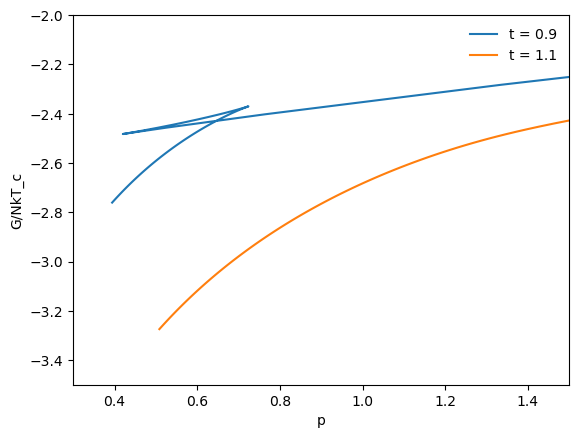

In [11]:
def g(v,t):
    return -t*log(3*v-1) + (t/(3*v-1)) - (9/(4*v))
t = [0.9,1.1]
v = np.linspace(0.4,5,100)
for i in range(len(t)):
    y1 = p(v,t[i])
    y2 = g(v,t[i])
    plt.plot(y1,y2,label=f't = {t[i]}')
plt.xlim(0.3,1.5)
plt.ylim(-3.5,-2)
plt.xlabel('p')
plt.ylabel('G/NkT_c')
plt.legend()
plt.show()

**Figure 2:** This figure shows the relationship between the scaled Gibbs Free Energy and the scaled pressured. At $T < T_c$ (blue), the plot shows similar curvature as the plot, at $T > T_c$ (orange), until a certain point, where the curve turns back and forth in a straight line.

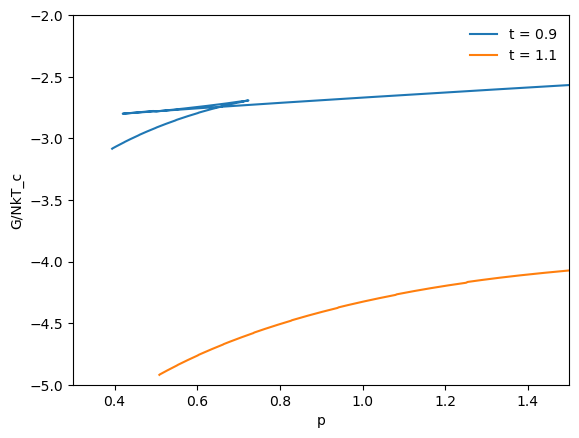

In [12]:
def gnum(t,v1,v2,h):
    nt = int((v2-v1)/h)+1
    v = np.linspace(v1, v2, nt)
    dg = (-t*v)/(v-(1/3))**2 + (9/4)*(1/v)**2
    return Simpson(dg,h)
vmin = 0.4
vmax = 5
dx = 0.01
h = 0.001

nv = int((vmax-vmin)/dx)+1
v = np.linspace(vmin, vmax, nv)
G = np.zeros(nv)
parr = np.zeros(nv)
for i in range(len(t)):
    for j in range(nv):
        parr[j] = p(v[j],t[i])
        G[j] = gnum(t[i],vmin,v[j], h)
    plt.plot(parr,G,label=f't = {t[i]}')
plt.xlim(0.3,1.5)
plt.ylim(-5,-2)
plt.xlabel('p')
plt.ylabel('G/NkT_c')
plt.legend()
plt.show()

**Figure 3:** The graph above shows the relationship between G and p, using numerical methods, for $T < T_c$ (blue) and $T > T_c$ (orange). We can see a shift in energy, compared to Figure 2, due to the fact that it was necessary to include bounds of integration. Again, t = 1.1 (gas only) and t = 0.9 (liquid-gas) have the same curve up until a certain point. Therefore, at t = 0.9, the plot is modeling the energy-pressure relationship for a gas (curve section) and then models the energy-pressure relationship for a liquid (linear section).

### Results
Now we can see that anything above $t = 1$ shows no kink to its plot; however, anything less has a kink. Additionally, we see that the numerical graph of the Gibbs free energy is translated in the y-direction since there's an extra added constant from the integration.

## Phase Transitions

### Introduction
In figure 1, we see that, for $t<1$ $(T<T_c)$, the system can have the same pressure at different volumes. This indicates a phase transition since we know that liquids are more dense (smaller volume) and gases are less dense (larger volume). Figure 2 and 3 show there are exists states with the same pressure but different Gibbs free energy; additionally, this is where the system phase transitions from an unstable state to a stable state at the same pressure. Finally, we see that for $t>1$, there's no pressure with a multiple volumes because there's no such phase transition, from liquid to gas. It's already a gas. Because of this, there's no "kink" to the orange plot in figure 2 and 3.

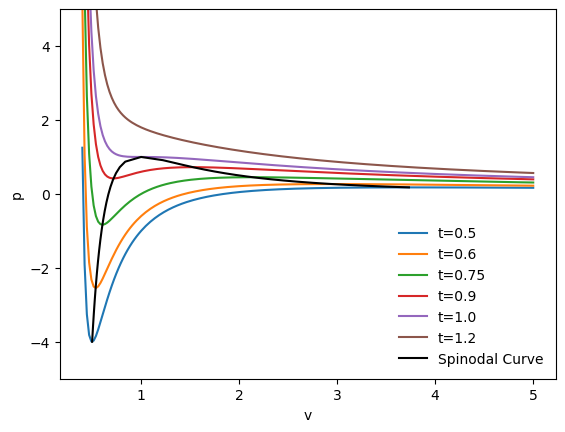

In [83]:
def pderan(v,t):
    return (-24*t)/(3*v - 1)**2 + (6/v**3)
def pder2(v,t):
    return (pderan(v+h,t) - pderan(v-h,t))/(2*h)
t = np.linspace(0.5,1,20)
plots = []
for i in range(len(t)):
    root1 = newtonraphson(pderan, pder2, 0.55,t[i]) # 1st root of p
    root2 = newtonraphson(pderan, pder2, 1.3,t[i]) # 2nd root of p
    proot1,proot2 = p(root1,t[i]),p(root2,t[i])
    plots.append([root1,proot1]) # Keeps p-v values together
    plots.append([root2,proot2]) # Keeps p-v values together
vsin = np.zeros(len(plots),float)
psin = np.zeros(len(plots),float)
plots.sort()
for i in range(len(plots)):
    vsin[i] = plots[i][0]
    psin[i] = plots[i][1]
v = np.linspace(0.4,5,200)
t = [0.5,0.60,0.75,0.90,1.0,1.2]
for i in range(len(t)):
    pplot = p(v,t[i])
    plt.plot(v,pplot,label=f't={t[i]}')
plt.plot(vsin,psin,'k-',label='Spinodal Curve')
plt.xlabel('v')
plt.ylabel('p')
plt.ylim(-5,5)
plt.legend()
plt.show()

**Figure 4:** The graph above shows plots of isotherms from $t = 0.5$ to $t = 1.0$ and the spinodal curve of the van der Waals gas, which traces out all of the local minima and maxima. Additionally, from this graph, we can see that the area/region under the spinodal curve is the coexistence region.

### Results

First, a system that's above its critical temperature is always a gas. Second, a system that's below or at its critical temperature is a liquid-gas, depending on the pressure and volume. The latter system is the most interesting because its state of matter depends on its pressure and volume. 
#### Liquid-Gas System ($t \leq 1$)
##### Phase Transition
For a liquid-gas system, We calculate the relationship between pressure and volume for each isotherm (at each temperature) and the relationship between the Gibbs free energy and pressure. We find multiple volumes with the same pressure in an isotherm (Figure 1), implying a phase transition--with the lowest volume being the liquid (denser) and the highest volume being the gas (less dense). However, to pinpoint which pressure it is, we find the pressure that has multiple Gibbs free energy values and that is before an abrupt change in volume that returns back to the same pressure. This pressure is where the plot intersects with itself (Figure 2 or 3). Now, we know when a liquid-gas system phase transitions into a gas only or liquid only. But what happens in between these points?
##### Coexistence Region
We can construct a curve that depends on the maxima and minima of each isotherm (Figure 4). This is called a sinodal curve. The region represents an unstable (based on analyzing Figure 2 or 3) region, where the system is a liquid and a gas. The region is anything under this sinodal curve.
##### Metastability
This state of the system could be that the system is either a superheated liquid or a supercooled gas. Additionally, this region is between the liquid phase transition and the lower volume bound of the coexistence region for the specific isotherm (superheated liquid) and between the gas phase transition and the upper volume bound of the coexistence region for the specific isotherm (supercooled gas). For example, at $t = 0.9$, the superheated liquid region is from $v \approx 0.5$ to $v \approx 0.75$. And the supercooled gas region is from $v \approx 1.5$ to $v \approx 1.70$.